
### Project Name: House Prices: Advanced Regression Techniques
 The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [3]:
%pwd

'/Users/md.thousif/Programming/Github projects/Python Jupyter/Data science proj tut'

In [4]:
%ls

Data_Analysis.ipynb        sample_submission.csv
Feature_Engineering.ipynb  test.csv
data_description.txt       train.csv


In [5]:
%cd Data science proj tut

[Errno 2] No such file or directory: 'Data science proj tut'
/Users/md.thousif/Programming/Github projects/Python Jupyter/Data science proj tut


In [6]:
# first import libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [7]:
# read the file

data_df = pd.read_csv('train.csv')

# inspect the data read i.e df
data_df.shape

(1460, 81)

### In Data Analysis We will Analyze To Find out the below stuff

- Missing Values
- All The Numerical Variables
- Distribution of the Numerical Variables
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers
- Relationship between independent and dependent feature(SalePrice)

### Missing Values

In [18]:
data_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
# isnull - returns a series of all records and boolean value for its null
x=data_df['MoSold'].isnull()
#print(type(x),'\n-\n', x)
y=data_df['Fence'].isnull().sum() # conducts a sum on bool value 0=F,1=T
print(y)

1179


In [8]:
# make a list of columns that have missing values
missing_value_cols = [col for col in data_df.columns if data_df[col].isnull().sum()>1]
print(len(missing_value_cols), missing_value_cols)

18 ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [39]:
# print the feature name and the percentage of missing values
# isnull().mean()=>total true/total no of recs .i.e. fraction of null in given col

for col in missing_value_cols:
    print(col, '\t', np.round(data_df[col].isnull().mean()*100, 4),  '\t % missing values')

LotFrontage 	 17.7397 	 % missing values
Alley 	 93.7671 	 % missing values
MasVnrType 	 0.5479 	 % missing values
MasVnrArea 	 0.5479 	 % missing values
BsmtQual 	 2.5342 	 % missing values
BsmtCond 	 2.5342 	 % missing values
BsmtExposure 	 2.6027 	 % missing values
BsmtFinType1 	 2.5342 	 % missing values
BsmtFinType2 	 2.6027 	 % missing values
FireplaceQu 	 47.2603 	 % missing values
GarageType 	 5.5479 	 % missing values
GarageYrBlt 	 5.5479 	 % missing values
GarageFinish 	 5.5479 	 % missing values
GarageQual 	 5.5479 	 % missing values
GarageCond 	 5.5479 	 % missing values
PoolQC 	 99.5205 	 % missing values
Fence 	 80.7534 	 % missing values
MiscFeature 	 96.3014 	 % missing values


### Once got the idea of missing values, their relavence to the problem has to be figuered out.
##### Now, for the given problem, the relationship between the 'sales price' feature and the missing vlaues has to be found out.
 This can be achived ploting on graph.

In [9]:
#data_df = 
data_df.groupby(by='Alley').median()['SalePrice']

Alley
Grvl    119500.0
Pave    172500.0
Name: SalePrice, dtype: float64

In [51]:
data_df['Fence'].isnull().mean()

0.8075342465753425

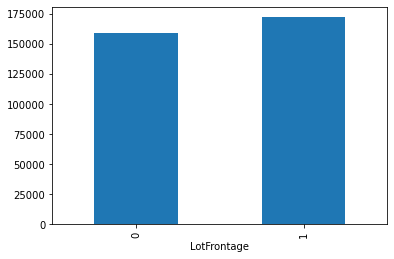

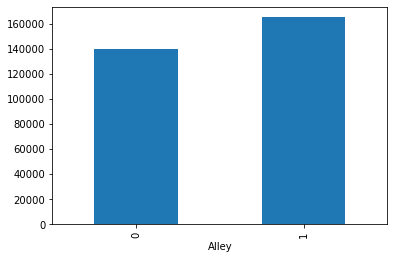

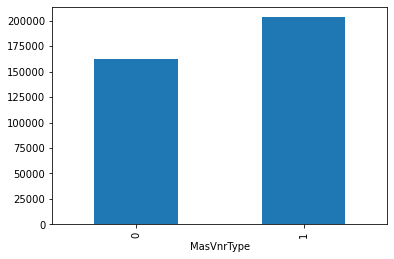

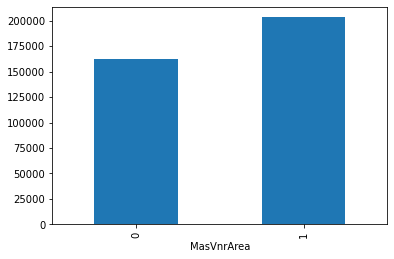

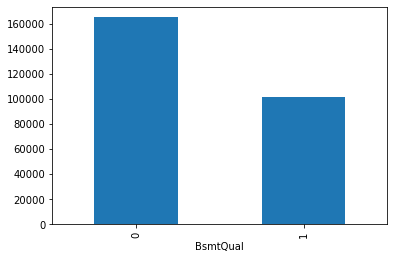

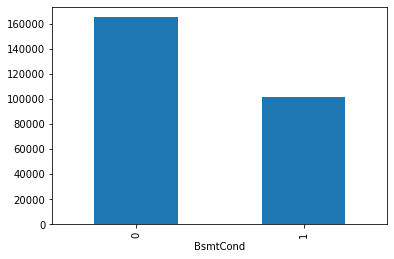

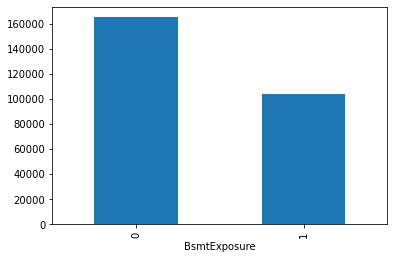

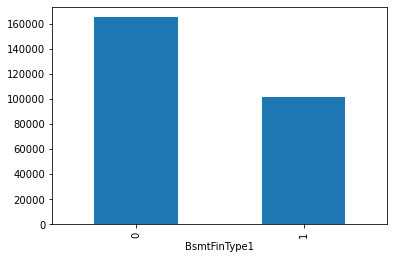

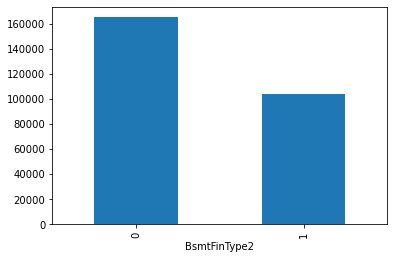

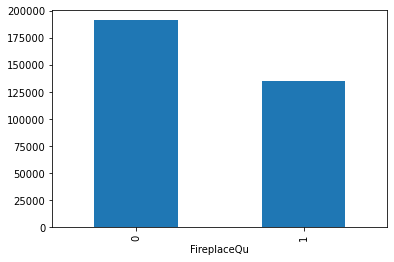

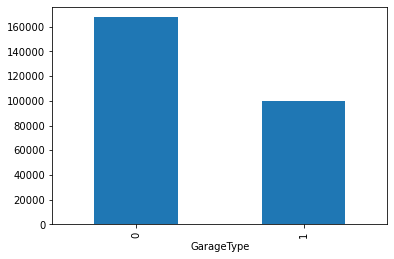

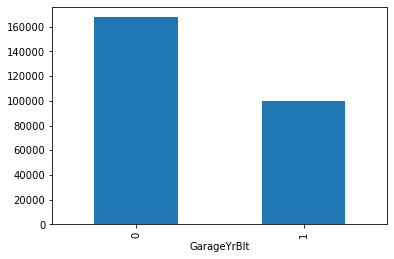

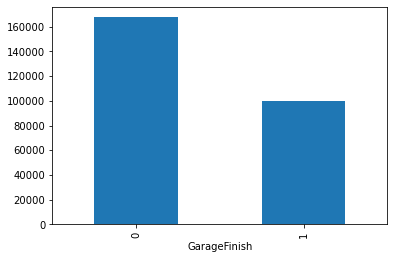

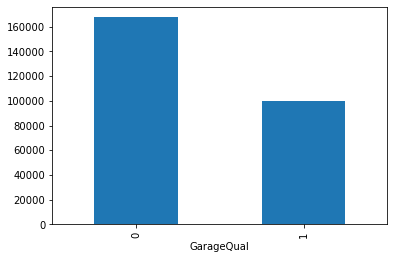

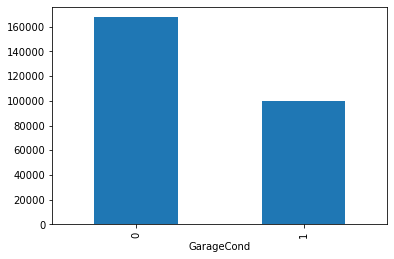

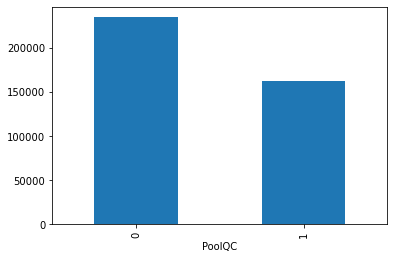

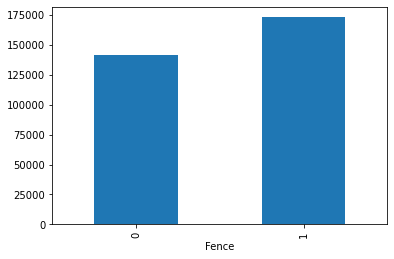

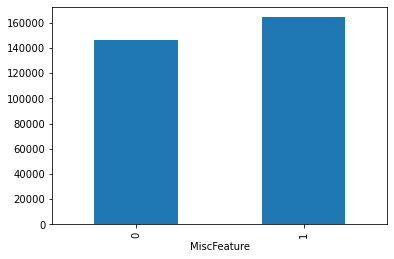

In [10]:
## df.groupby(col) returns a series of view grouped by 'col' 
## df.groupby('c').mean() returns a df grouped by column 'c', other columns of df is 
## mean wrt to col-c valuesl

for col in missing_value_cols:
    df = data_df.copy()
    
    # substituting 1 where null and 0 otherwise
    df[col] = np.where(df[col].isnull(), 1, 0)
    
    df.groupby(col).median()['SalePrice'].plot.bar()
    plt.show()

Always note the observation - good practice.
obervation:
some features(cols) with null values are provided shows us an increase in sales price and some features show a decrese with null values

### Numerical Features

Numerical variables are of 2 types
   - Discrete Variables - Which has finite number of unique values in a given column. In this context finite values < 25 are considered as discrete.
   - Continious variables - Which has a lot of unique values, can be classified as continious variables. In this context finite values > 25 are considered as continious.

In [ ]:
data_df.info()

In [67]:
print(data_df.dtypes)
print(data_df['Fence'].dtype)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
object


In [11]:
num_features = [col for col in data_df.columns if data_df[col].dtype != 'object']
print('numerical columns :', len(num_features))

data_df[num_features].head() #visualization

numerical columns : 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


### Temporal Variables .i.e. Datetime Variables


In [12]:
year_feature = [col for col in data_df.columns if 'Year' in col or 'Yr' in col]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<AxesSubplot:xlabel='YrSold'>

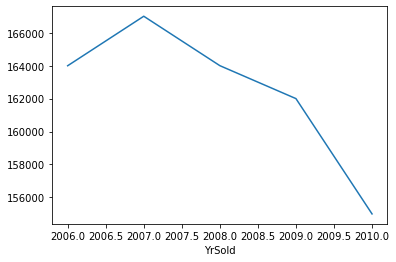

In [13]:
# to check relation btwn year sold and sale price

data_df.groupby('YrSold').median()['SalePrice'].plot()

<AxesSubplot:>

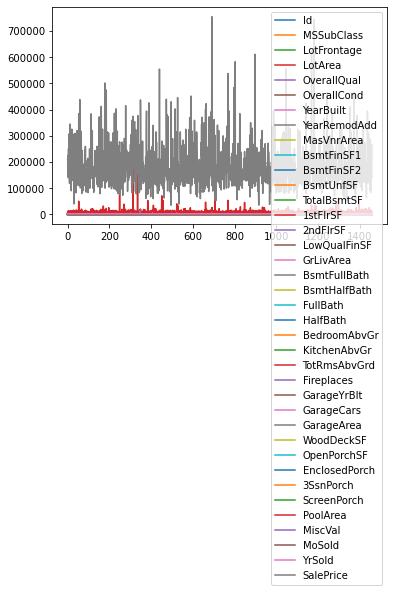

In [123]:
data_df.plot()

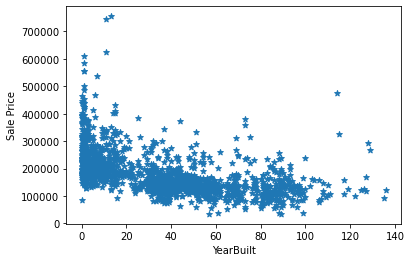

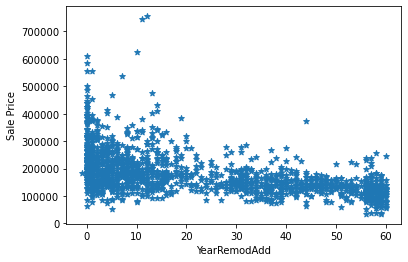

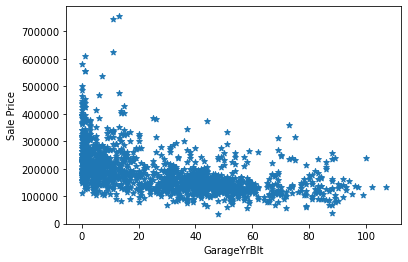

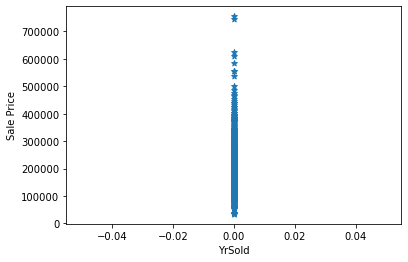

In [95]:
for feature in year_feature:
    df = data_df.copy()
    
    # calculating the gap
    df[feature+'_gap'] = df['YrSold'] - df[feature]
    
    # relation of gap with sale price
    plt.scatter(df[feature+'_gap'], df['SalePrice'], marker='*')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()
    
    
    
    

#### Discrete var

In [14]:
descrete_features = [col for col in num_features 
                     if len(data_df[col].unique()) < 25
                     and col not in year_feature]

print(len(descrete_features),'\n - \n', descrete_features)

17 
 - 
 ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [15]:
data_df[descrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [104]:
# Relationship of descrete features with sale peice

for feature in descrete_features:
    df = data_df.copy()
    #plt.bar(df.groupby(feature).median()['SalePrice'])
    df.groupby(feature).median()['SalePrice'].plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

AttributeError: 'Series' object has no attribute 'scatter'

#### Continious var

In [16]:
continious_features = [col for col in num_features 
                       if col not in descrete_features+year_feature]
print(len(continious_features), '\n - \n', continious_features)

17 
 - 
 ['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [17]:
#continious_features.remove('Id')
continious_features

['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

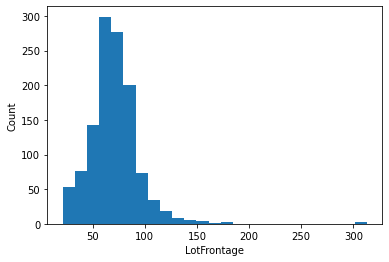

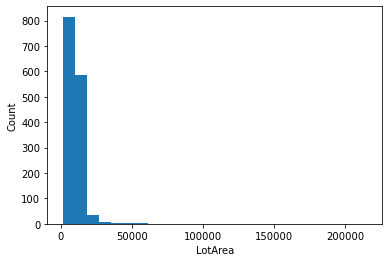

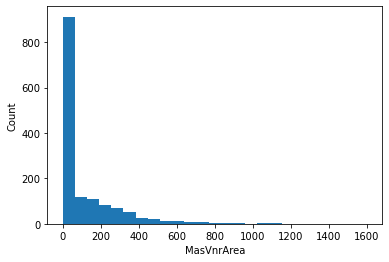

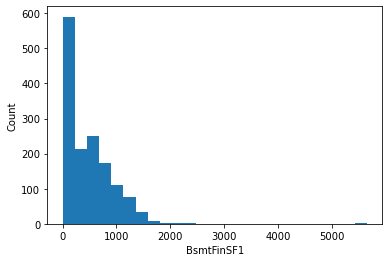

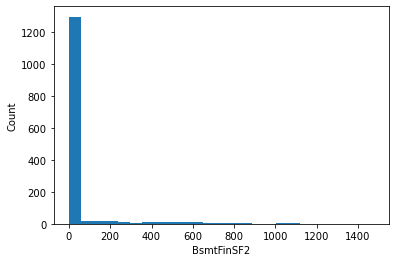

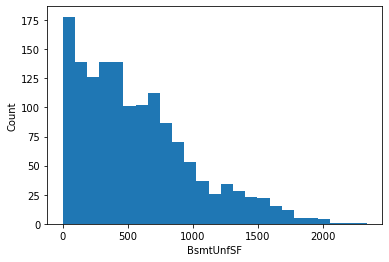

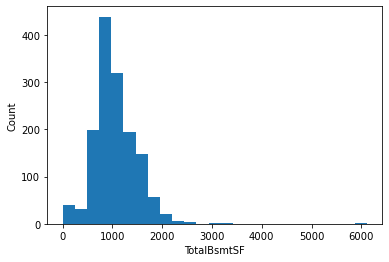

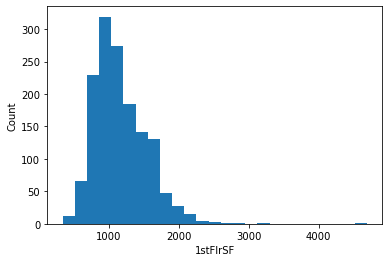

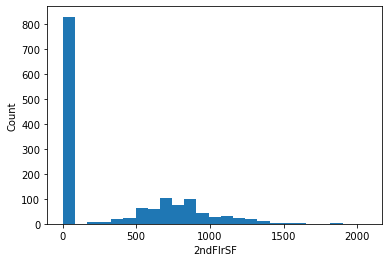

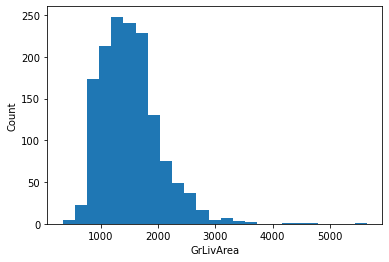

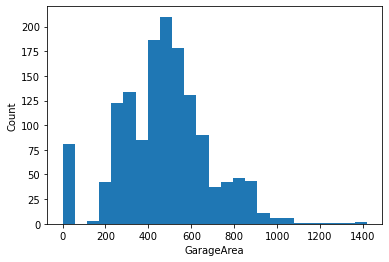

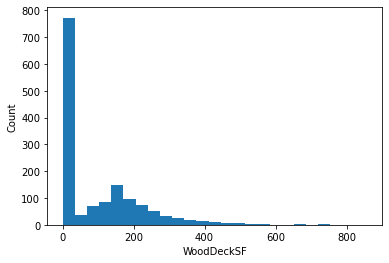

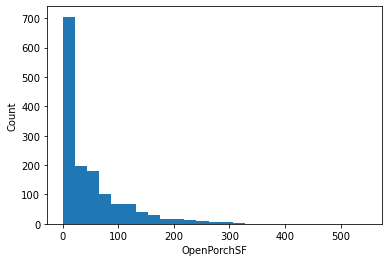

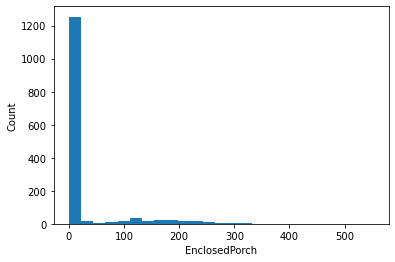

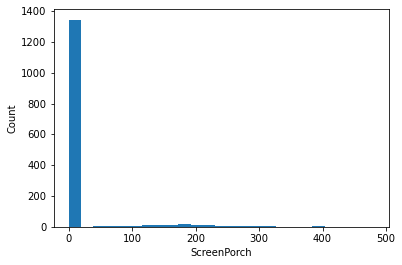

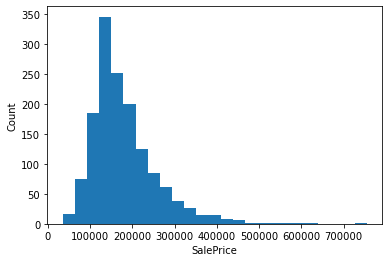

In [125]:
# Analyze distribution of continious values by creating histograms

for feature in continious_features:
    #data_df[feature].hist(bins=25)
    plt.hist(data_df[feature], bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

By understanding the graphs above we have to check if the features are normally distributed or not and perform logarithimic transformation where needed.

Here, -- 
['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'GrLivArea'] --
needs log transformations




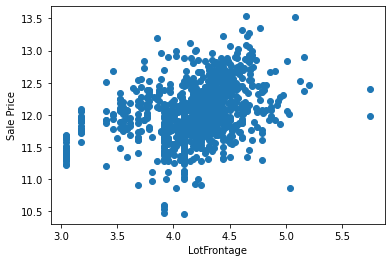

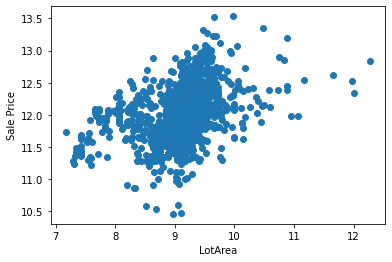

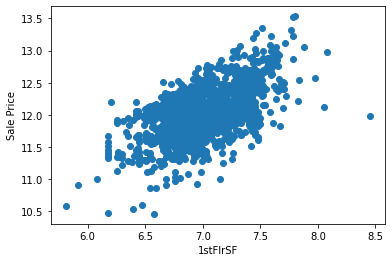

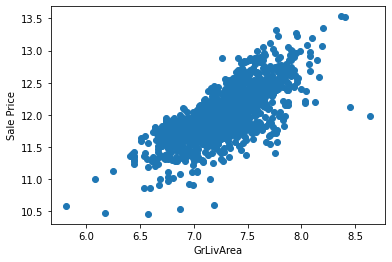

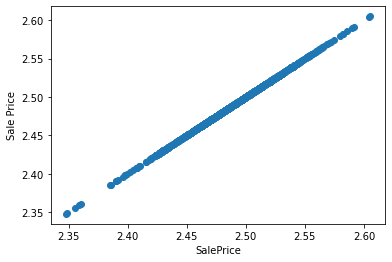

In [152]:


for feature in continious_features:
    df = data_df.copy()

    #choosing unique() as df['fet'] returns a series & 
    #.unique returns a np.ndarray
    if 0 in df[feature].unique(): 
        pass
    else:
        df[feature] = np.log(df[feature])
        df['SalePrice'] = np.log(df['SalePrice'])
        plt.scatter(df[feature], df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

### Outliers
    Outliers can be found out by ploting boxlpot.
    

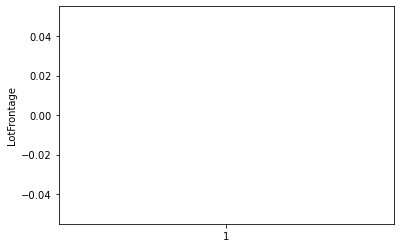

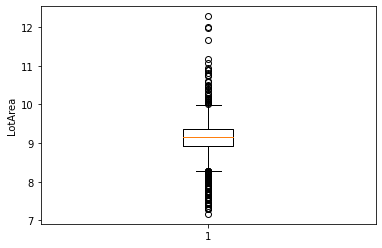

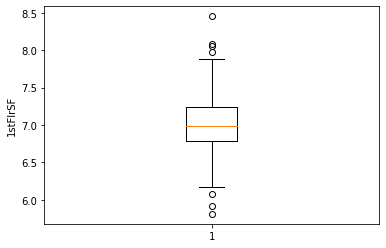

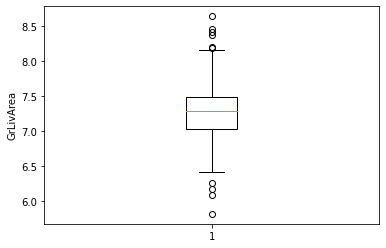

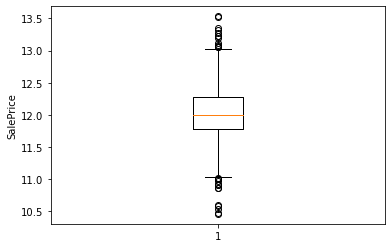

In [133]:
for feature in continious_features:
    df = data_df.copy()

    #choosing unique() as df['fet'] returns a series & 
    #.unique returns a np.ndarray
    if 0 in df[feature].unique(): 
        pass
    else:
        df[feature] = np.log(df[feature])
        plt.boxplot(df[feature])
        plt.ylabel(feature)
        plt.show()

### Categorical Features

In [136]:
categorical_features = [col for col in data_df.columns if data_df[col].dtype == 'O']
print(len(categorical_features),'\n - -\n', categorical_features)

43 
 - -
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [142]:
data_df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [145]:
for feature in categorical_features:
    print('{} has {} categories'.format(feature, len(data_df[feature].unique())))

MSZoning has 5 categories
Street has 2 categories
Alley has 3 categories
LotShape has 4 categories
LandContour has 4 categories
Utilities has 2 categories
LotConfig has 5 categories
LandSlope has 3 categories
Neighborhood has 25 categories
Condition1 has 9 categories
Condition2 has 8 categories
BldgType has 5 categories
HouseStyle has 8 categories
RoofStyle has 6 categories
RoofMatl has 8 categories
Exterior1st has 15 categories
Exterior2nd has 16 categories
MasVnrType has 5 categories
ExterQual has 4 categories
ExterCond has 5 categories
Foundation has 6 categories
BsmtQual has 5 categories
BsmtCond has 5 categories
BsmtExposure has 5 categories
BsmtFinType1 has 7 categories
BsmtFinType2 has 7 categories
Heating has 6 categories
HeatingQC has 5 categories
CentralAir has 2 categories
Electrical has 6 categories
KitchenQual has 4 categories
Functional has 7 categories
FireplaceQu has 6 categories
GarageType has 7 categories
GarageFinish has 4 categories
GarageQual has 6 categories
Garag

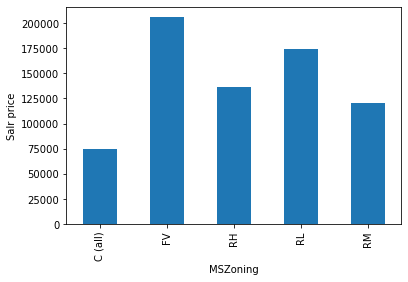

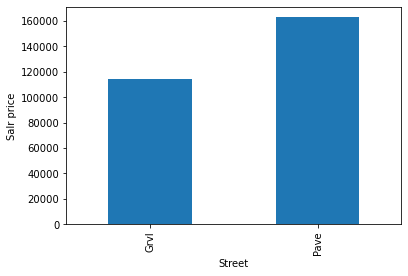

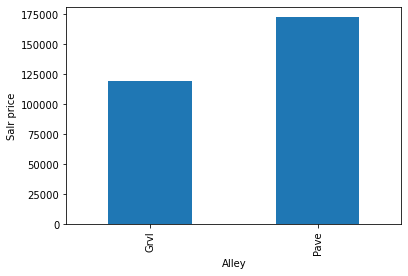

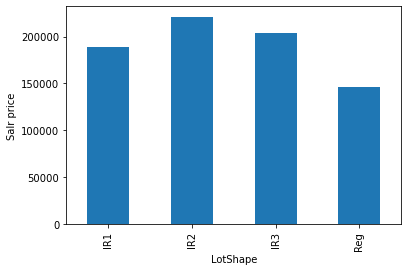

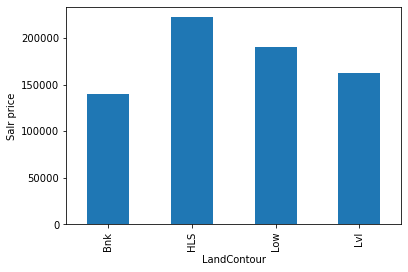

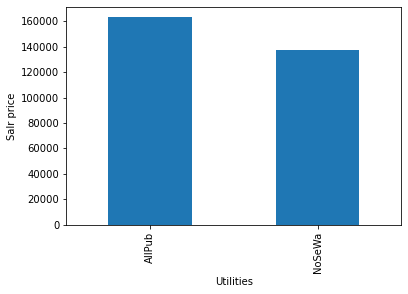

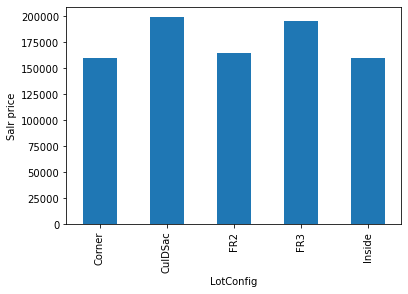

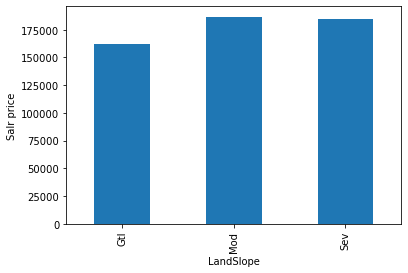

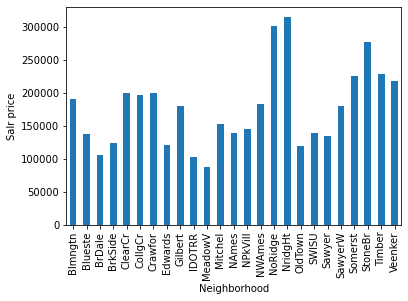

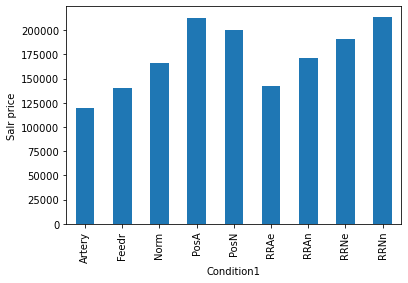

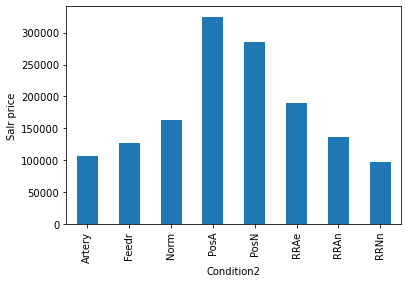

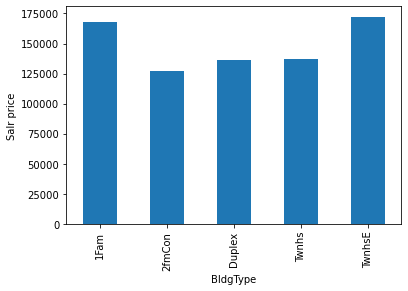

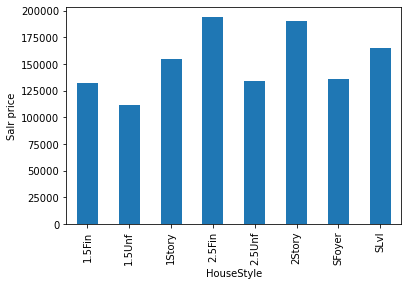

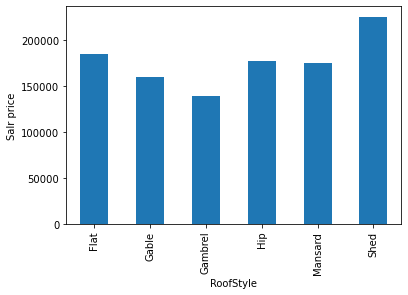

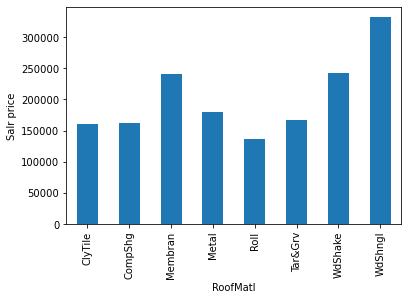

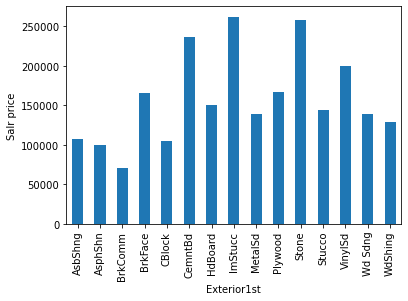

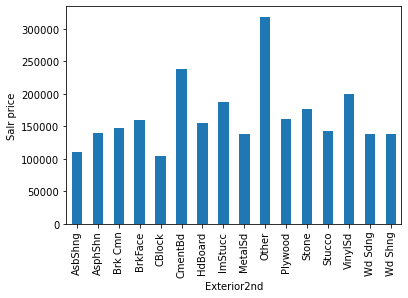

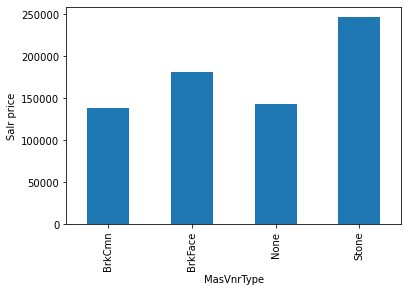

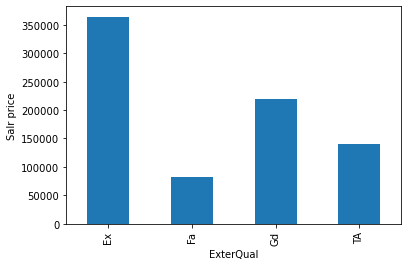

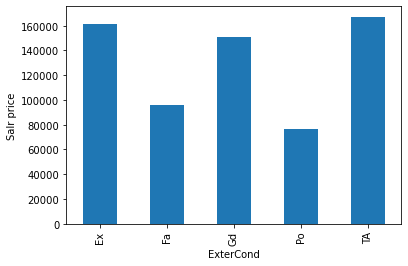

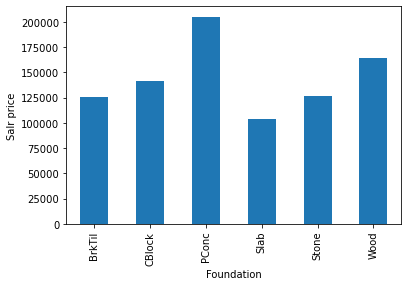

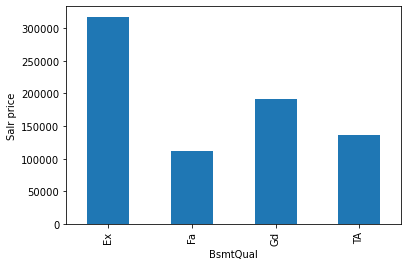

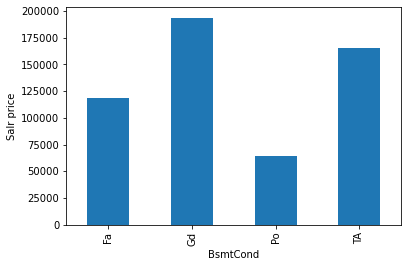

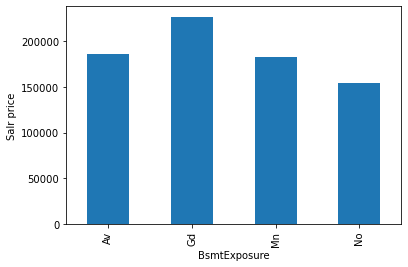

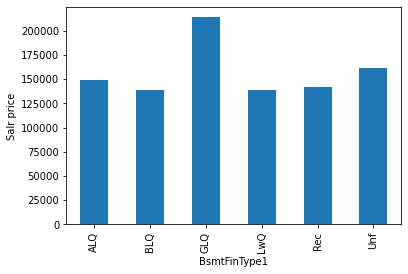

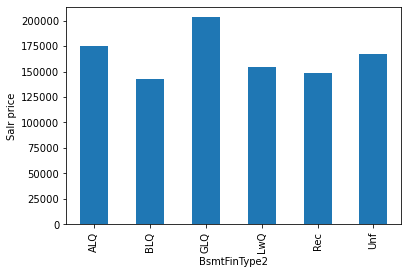

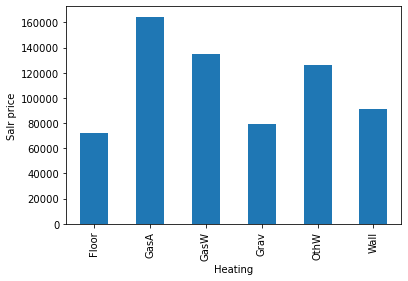

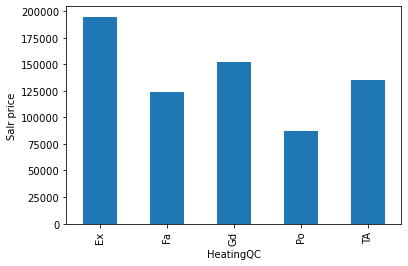

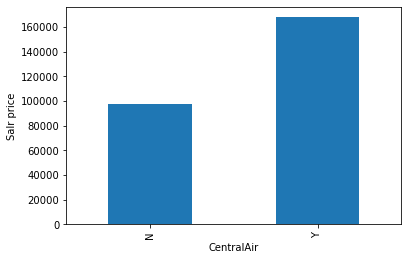

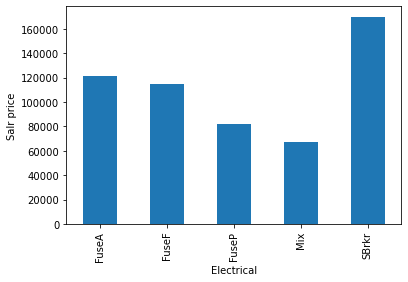

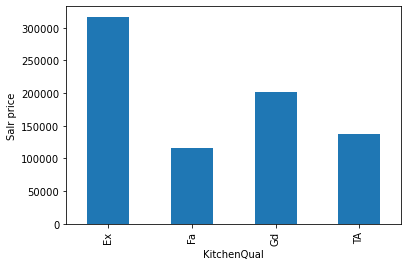

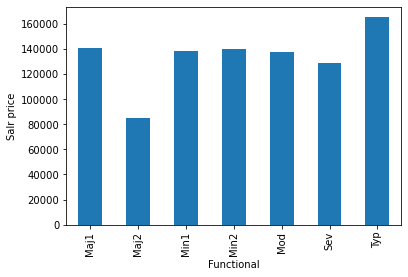

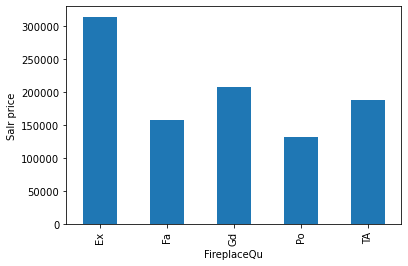

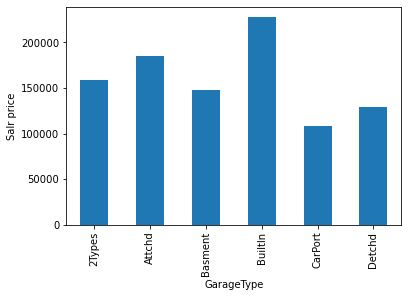

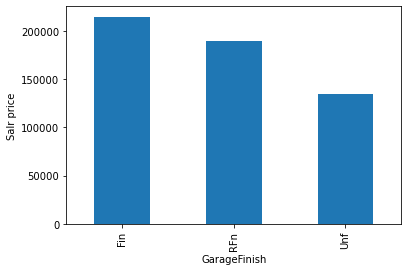

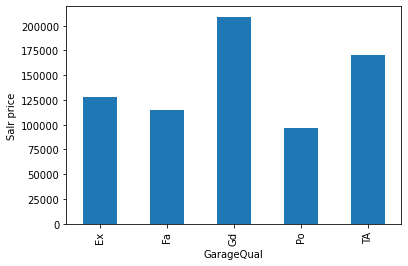

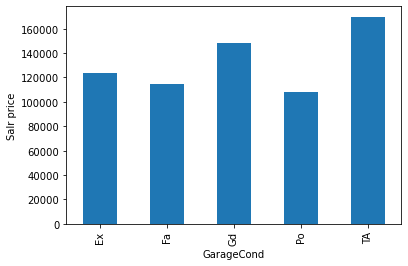

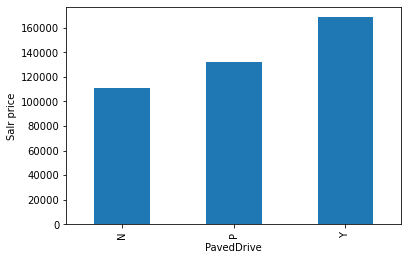

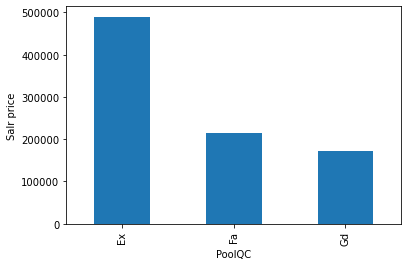

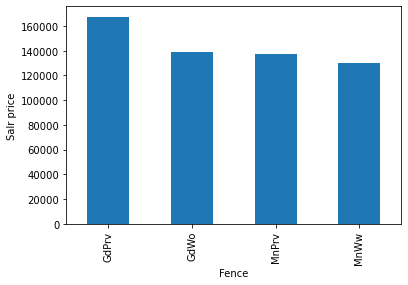

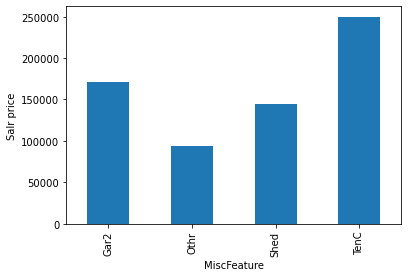

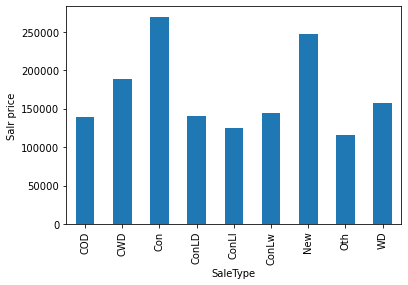

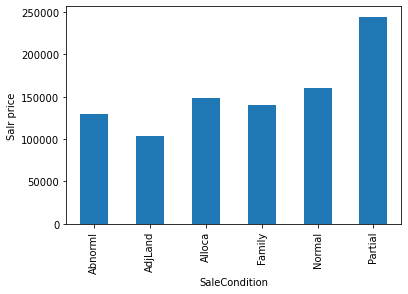

In [148]:
## Find relation btwn categorical and relational variables

for feature in categorical_features:
    df = data_df.copy()
    df.groupby(feature).median()['SalePrice'].plot.bar()
    plt.ylabel('Salr price')
    plt.show()